## Recomendação de Produtos por Similaridade Visual


Sistema de recomendação básico para recomendar itens semelhantes a um determinado produto.

Primeiro com um modelo CNN pré-treinado de Keras se faz a extraição dos recursos da imagem. Em seguida, calcula-se as semelhanças entre os diferentes produtos usando os recursos da imagem extraídos anteriormente.

## 1. Imports e setup dos parâmetros

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from keras.applications import vgg16
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
# from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Image-Recommendation
!ls

/content/drive/My Drive/Image-Recommendation
style  style.zip


In [ ]:
# !mkdir style
# %cd style
!ls

style  style.zip


In [ ]:
!unzip "/content/drive/MyDrive/Image-Recommendation/style.zip" -d "/content/drive/MyDrive/Image-Recommendation/style/"

Archive:  /content/drive/MyDrive/Image-Recommendation/style.zip
  inflating: /content/drive/MyDrive/Image-Recommendation/style/0_0_001.png  
   creating: /content/drive/MyDrive/Image-Recommendation/style/__MACOSX/
  inflating: /content/drive/MyDrive/Image-Recommendation/style/__MACOSX/._0_0_001.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/0_0_002.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/__MACOSX/._0_0_002.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/0_0_003.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/__MACOSX/._0_0_003.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/0_0_004.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/__MACOSX/._0_0_004.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/0_0_005.png  
  inflating: /content/drive/MyDrive/Image-Recommendation/style/__MACOSX/._0_0_005.png  
  inflating: /content/drive/MyDrive/Im

In [ ]:
# %cd ..
%cd style
!ls

/content/drive/MyDrive/Image-Recommendation/style
StyleColorImages.h5


Usando o backend do Tensorflow

In [ ]:
# preparação dos parâmetros
imgs_path = "/content/drive/MyDrive/Image-Recommendation/style/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # quantidade das imagens mais parecidas

## 2. Carregar o modelo VGG pre-traineda do Keras

In [ ]:
# Carrega o modelo
vgg_model = vgg16.VGG16(weights='imagenet')

# remove a última camada para ter as features ao invés das predições
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# printa as camadas do modelo CNN
feat_extractor.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## 3. Pegar o caminho das imagens

In [ ]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "png" in x]

print("number of images:",len(files))

number of images: 2184


## 4. Testar com uma imagem na CNN (Rede Neural Convolucional)


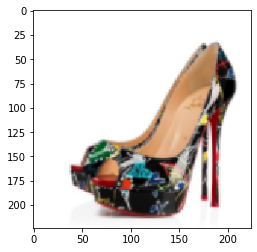

Imagem Carregada Com Sucesso!


In [ ]:
# Carregar uma imagem no formato PIL
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Imagem Carregada Com Sucesso!")

In [ ]:
"""
- Converter a imagem PIL em um array do Numpy
- Em PIL a imagem está em (width, height, channel)
- No Numpy a imagem fica em (height, width, channel)
"""
numpy_image = img_to_array(original)

"""
- converte as imagens / imagens para o formato batch
- expand_dims vai adicionar uma camada extra aos dados em um eixo particular
- a matriz da rede deve estar no formato (batchsize, height, width, channels)
- então se adiciona a camada extra no eixo 0.
"""
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# Prepara a imagem para o modelo VGG 
processed_image = preprocess_input(image_batch.copy())


image batch size (1, 224, 224, 3)


In [ ]:
# Extrair as features
img_features = feat_extractor.predict(processed_image)

print("Features extraida com!")
print("Número de features das imagens :",img_features.size)
img_features

1/1 [==============================] - 1s 1s/step
features extraida com!
número de features das imagens : 4096


array([[0.        , 0.        , 0.98376477, ..., 1.66377   , 0.        ,
        0.        ]], dtype=float32)

## 5. Alimentar a CNN com todas as imagens

In [ ]:
# Caregar todas as imagens e prepará-las para alimentar a CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [ ]:
# Extrair as features das imagens
imgs_features = feat_extractor.predict(processed_imgs)

print("features extraídas com sucesso!")
imgs_features.shape

69/69 [==============================] - 1378s 20s/step
features extraídas com sucesso!


(2184, 4096)

## 6. Calcular o cosseno das similaridades

In [ ]:
# calculo de cosseno de metricas de similaridade
cos_similarities = cosine_similarity(imgs_features)

# guardar os resultados em um dataframe do Pandas
cos_similarities_df = pd.DataFrame(cos_similarities, columns=files, index=files)
cos_similarities_df.head(3)

,/content/drive/MyDrive/Image-Recommendation/style/0_0_001.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_002.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_003.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_004.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_005.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_006.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_007.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_008.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_009.png,/content/drive/MyDrive/Image-Recommendation/style/0_0_010.png,...,/content/drive/MyDrive/Image-Recommendation/style/6_9_012.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_013.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_014.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_015.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_016.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_017.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_018.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_019.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_020.png,/content/drive/MyDrive/Image-Recommendation/style/6_9_021.png
/content/drive/MyDrive/Image-Recommendation/style/0_0_001.png,1.000000,0.554047,0.558606,0.569193,0.521644,0.592031,0.503121,0.587526,0.352372,0.402142,...,0.301020,0.259099,0.247524,0.354853,0.276685,0.399439,0.215223,0.263318,0.362413,0.295160
/content/drive/MyDrive/Image-Recommendation/style/0_0_002.png,0.554047,1.000000,0.352095,0.421485,0.522096,0.451593,0.321059,0.683562,0.364141,0.295505,...,0.285047,0.265274,0.204258,0.326139,0.348535,0.518782,0.210399,0.309710,0.334937,0.271462
/content/drive/MyDrive/Image-Recommendation/style/0_0_003.png,0.558606,0.352095,1.000000,0.818573,0.382171,0.444806,0.624093,0.450202,0.348380,0.279828,...,0.403518,0.339660,0.243398,0.399831,0.352441,0.292396,0.251002,0.329957,0.379226,0.276617


## 7. Encontrar os produtos mais similares
Implementar de uma função que, para cada produto, retorne, visualmente, outros produtos mais parecidos

In [ ]:
# Função que retorna produtos similares à partir de um anteriormente fornecido
def top_similar_products(given_img):

    print("-"*35)
    print("Produto Original:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-"*35)
    print("Produtos mais parecidos:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Pontuação de Similaridade : ",closest_imgs_scores[i])


-----------------------------------
Produto Original:


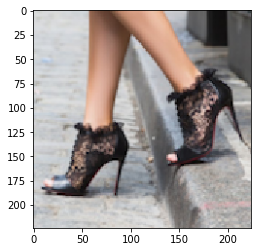

-----------------------------------
Produtos mais parecidos:


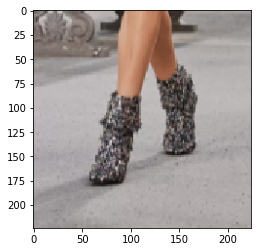

Pontuação de Similaridade :  0.6204598


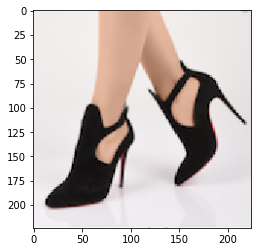

Pontuação de Similaridade :  0.5067787


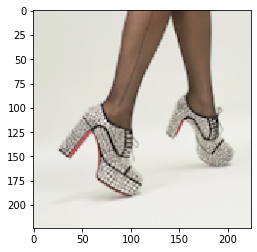

Pontuação de Similaridade :  0.5021414


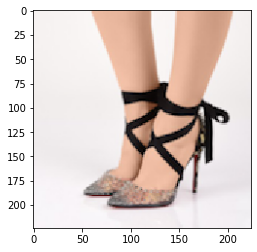

Pontuação de Similaridade :  0.481772


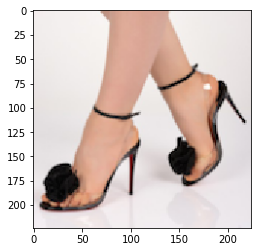

Pontuação de Similaridade :  0.4737205


In [ ]:
top_similar_products(files[10])